# Fundamentos 

## Resumen

Se presenta la nomenclatura y su interpretación en python para el modelado de robots

### Uso básico de matrices

Se presenta sympy

In [1]:
#Encabezado para el uso de matrices y complificación de ecuaciones
from sympy import *
#Definicion de la variable theta
theta = Symbol('theta')
theta

theta

In [2]:
#Definicion de la matriz de rotacion en 2D
R = Matrix([ [cos(theta), -sin(theta)], [sin(theta), cos(theta)]])
R

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

Uso de operaciones con matrices

In [3]:
#Calculo del determinante de la matriz R
R.det()

sin(theta)**2 + cos(theta)**2

Uso de la operación de simplifiación 

In [4]:
#Simplificacion del determinante de la matriz de rotacion
R.det().simplify()

1

La matriz de rotacion en dos dimensiones se puede procesar como una función :

In [5]:
#Definicion de la funcion de la matrix de rotacion
def rot_2D(theta):
    R = Matrix([ [cos(theta), -sin(theta), 0], [sin(theta), cos(theta), 0],[0, 0, 1]])
    return R

Comprobación de la función

In [6]:
#Definición de los angulos de entrada
theta_1, theta_2 = symbols('theta_1, theta_2')
theta_1

theta_1

In [7]:
theta_2

theta_2

Matriz de rotación 

In [8]:
R_1 = rot_2D(theta_1)
R_1

Matrix([
[cos(theta_1), -sin(theta_1), 0],
[sin(theta_1),  cos(theta_1), 0],
[           0,             0, 1]])

In [9]:
R_2 = rot_2D(theta_2)
R_2

Matrix([
[cos(theta_2), -sin(theta_2), 0],
[sin(theta_2),  cos(theta_2), 0],
[           0,             0, 1]])

Producto entre la matriz $\mathbf{R}_1$ y la matriz $\mathbf{R}_2$ 

$\mathbf{R}_1 \,\mathbf{R}_2$

In [10]:
R_1*R_2

Matrix([
[-sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2), -sin(theta_1)*cos(theta_2) - sin(theta_2)*cos(theta_1), 0],
[ sin(theta_1)*cos(theta_2) + sin(theta_2)*cos(theta_1), -sin(theta_1)*sin(theta_2) + cos(theta_1)*cos(theta_2), 0],
[                                                     0,                                                      0, 1]])

Simplificando el producto entre las dos martrices

In [11]:
R_1_2 = simplify(R_1*R_2) 
R_1_2

Matrix([
[cos(theta_1 + theta_2), -sin(theta_1 + theta_2), 0],
[sin(theta_1 + theta_2),  cos(theta_1 + theta_2), 0],
[                     0,                       0, 1]])

Las matrices de rotación también están definidas en las libreras de Sympy mediante el comando 

```python

import sympy as sym # Establece la equivalencia entre sympy con sym

#Rotacion sobre el eje x
sym.rot_axis1("<variable>")

#Rotacion sobre el eje y
sym.rot_axis2("<variable>")

#Rotacion sobre el eje z
sym.rot_axis3("<variable>")

```

Los comandos rot_axis1, rot_axis2 y rot_axis3 son los comandos definen la funcion de una matrix de rotacion al incluir sym. se puede implementar lenguaje simbolico en ellas. Se presenta el siguiente ejemplo:


In [12]:
import sympy as sym
# Matriz de rotacion sobre el eje x
gamma = symbols('gamma')
R_x = sym.rot_axis1(gamma)
R_x

Matrix([
[1,           0,          0],
[0,  cos(gamma), sin(gamma)],
[0, -sin(gamma), cos(gamma)]])

In [13]:
#Matriz de rotacion sobre el eje y
beta = symbols('beta')
R_y = sym.rot_axis2(beta)
R_y

Matrix([
[cos(beta), 0, -sin(beta)],
[        0, 1,          0],
[sin(beta), 0,  cos(beta)]])

In [14]:
#Matriz de rotacion sobre el eje z
alpha = symbols('alpha')
R_z = sym.rot_axis3(alpha)
R_z

Matrix([
[ cos(alpha), sin(alpha), 0],
[-sin(alpha), cos(alpha), 0],
[          0,          0, 1]])

## Nota

Las rotaciones definidas con esta relación son rotaciones pasivas, es decir lo que gira es el eje y no el sistema de referencia. En el caso de la robótica se utilizan rotaciones activas, el sistema de referencia rota y el eje de rotación permanece fijo por lo que las rotaciones para este caso son:

In [15]:
R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
R_z

Matrix([
[cos(alpha), -sin(alpha), 0],
[sin(alpha),  cos(alpha), 0],
[         0,           0, 1]])

In [16]:
R_y = Matrix([ [cos(beta), 0, sin(beta)], [0, 1, 0],[-sin(beta), 0, cos(beta)]])
R_y

Matrix([
[ cos(beta), 0, sin(beta)],
[         0, 1,         0],
[-sin(beta), 0, cos(beta)]])

In [17]:
R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
R_x

Matrix([
[1,          0,           0],
[0, cos(gamma), -sin(gamma)],
[0, sin(gamma),  cos(gamma)]])

## Rotación general

Para descripción de la orientación entre dos sistemas de referencia se empleará la siguiente secuencia de orientación utilizando las matrices de rotación:

$$
\mathbf{R}(\alpha,\beta,\gamma) = \mathbf{R}_{z}(\alpha) \mathbf{R}_{y}(\beta) \mathbf{R}_{x}(\gamma)
$$




In [18]:
R = R_z*R_y*R_x
R

Matrix([
[cos(alpha)*cos(beta), -sin(alpha)*cos(gamma) + sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(gamma) + sin(beta)*cos(alpha)*cos(gamma)],
[sin(alpha)*cos(beta),  sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha)],
[          -sin(beta),                                     sin(gamma)*cos(beta),                                    cos(beta)*cos(gamma)]])

# Definición de la matriz de transformación homogenea

La matriz de tranformación homógenea es un arreglo el cual contiene las relaciones de posición y orientación, la cual se define:

$$
{}^{i}\mathbf{T}_{j} = \begin{equation}
\begin{pmatrix}
{}^{i}\mathbf{R}_{j} & {}^{i}\mathbf{p}_{j}\\
\mathbf{0}^{T} & 1 
\end{pmatrix}
\end{equation} 
$$

- ${}^{i}\mathbf{R}_{j}$ es la matriz de rotación que describe la orientación de un sistema {j} con respecto a un sistema anterior {i}.

- ${}^{i}\mathbf{p}_{j}$ es el vector de posición del origen del sistema {j} con respecto al origen del sistema {i}.

- $\mathbf{0}^{T}$ es el vector de perspectiva, que para este caso se determina como nulo.

- 1 es el factor de escala de la matriz, que para este caso se mantiene unitario. 

La definición de esta tranformación en Sympy es:

In [19]:
def trans_homo(x, y, z, gamma, beta, alpha):
    T = Matrix([[cos(alpha)*cos(beta), -sin(alpha)*cos(gamma)+sin(beta)*sin(gamma)*cos(alpha), sin(alpha)*sin(gamma)+sin(beta)*cos(alpha)*cos(gamma), x],
         [sin(alpha)*cos(beta), sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), sin(alpha)*sin(beta)*cos(gamma)-sin(gamma)*cos(alpha), y],
        [-sin(beta), sin(gamma)*cos(beta), cos(beta)*cos(gamma), z],[0, 0, 0, 1]])
    return T   

In [20]:
# Comprobación de la matriz
x, y, z, gamma, beta, alpha = symbols('x, y, z, gamma, beta, alpha')

trans_homo(x, y, z, 0, 0, 0)

Matrix([
[1, 0, 0, x],
[0, 1, 0, y],
[0, 0, 1, z],
[0, 0, 0, 1]])

In [21]:
trans_homo(0, 0, 0, gamma, 0, 0)

Matrix([
[1,          0,           0, 0],
[0, cos(gamma), -sin(gamma), 0],
[0, sin(gamma),  cos(gamma), 0],
[0,          0,           0, 1]])

In [22]:
trans_homo(0, 0, 0, 0, beta, 0)

Matrix([
[ cos(beta), 0, sin(beta), 0],
[         0, 1,         0, 0],
[-sin(beta), 0, cos(beta), 0],
[         0, 0,         0, 1]])

In [23]:
trans_homo(0, 0, 0, 0, 0, alpha)

Matrix([
[cos(alpha), -sin(alpha), 0, 0],
[sin(alpha),  cos(alpha), 0, 0],
[         0,           0, 1, 0],
[         0,           0, 0, 1]])

# Ejemplo de aplicación

Se propone cálcular el modelo cinemático directo de un robot tipo RRR sobre el plano xy, como se presenta en la siguiente figura:


![RRR](imagenes/RRR_Robot.png)


El modelo cinemático consiste en describir la pose, posición y orientación, del sistema de referencia {P} asociado al efector final del robot con respecto al sistema referencia inercial {O}. La pose del robot se describe mediante el vector de pose en función de las variables de postura del robot ${}^{O}\mathbf{\xi}_{P}(q)$


$$
{}^{O}\mathbf{\xi}_{P}(q) = \begin{equation} \begin{pmatrix}
{}^{O}\mathbf{p}_{P}(q) \\
{}^{O}\mathbf{\theta}_{P}(q)
\end{pmatrix} \end{equation} =
$$


$$
= \begin{equation} \begin{pmatrix}
{}^{O}x_{P}(q) \\ {}^{O}y_{P}(q) \\ {}^{O}z_{P}(q) \\ {}^{O}\gamma_{P}(q) \\ {}^{O}\beta_{P}(q) \\ {}^{O}\alpha_{P}(q)
\end{pmatrix} \end{equation}
$$

Para el cálculo del vector ${}^{O}\mathbf{\xi}_{P}$ es necesario cálcular la transformación homógenea ${}^{O}\mathbf{T}_{P}$ siguendo el siguiente planteamiento:


$$
{}^{O}\mathbf{T}_{P} = {}^{O}\mathbf{T}_{1} \, {}^{1}\mathbf{T}_{2} \, {}^{2}\mathbf{T}_{3} \, {}^{3}\mathbf{T}_{p}
$$

A continuación, se presenta el cálculo de la transformación homogénea ${}^{O}\mathbf{T}_{P}$ y del vector de postura del robot ${}^{O}\mathbf{\xi}_{P}(q)$:

In [24]:
# Definicion de las variables para la primera transformacion
theta_1, x_1, y_1 = symbols('theta_1, x_1, y_1')

T_O_1 = trans_homo(x_1, y_1, 0, 0, 0, theta_1)
T_O_1

Matrix([
[cos(theta_1), -sin(theta_1), 0, x_1],
[sin(theta_1),  cos(theta_1), 0, y_1],
[           0,             0, 1,   0],
[           0,             0, 0,   1]])

In [25]:
# Definicion de las variables para la segunda transformacion
L_1, theta_2 = symbols('L_1, theta_2')

T_1_2 = trans_homo(L_1, 0, 0, 0, 0, theta_2)
T_1_2

Matrix([
[cos(theta_2), -sin(theta_2), 0, L_1],
[sin(theta_2),  cos(theta_2), 0,   0],
[           0,             0, 1,   0],
[           0,             0, 0,   1]])

In [26]:
# Definicion de las variables para la tercera transformacion
L_2, theta_3 = symbols('L_2, theta_3')

T_2_3 = trans_homo(L_2, 0, 0, 0, 0, theta_3)
T_2_3

Matrix([
[cos(theta_3), -sin(theta_3), 0, L_2],
[sin(theta_3),  cos(theta_3), 0,   0],
[           0,             0, 1,   0],
[           0,             0, 0,   1]])

In [27]:
# Definicion de las variables para la cuarta transformacion
L_3 = symbols('L_3')

T_3_P = trans_homo(L_3, 0, 0, 0, 0, 0)
T_3_P

Matrix([
[1, 0, 0, L_3],
[0, 1, 0,   0],
[0, 0, 1,   0],
[0, 0, 0,   1]])

Cálculando la matriz de transformación ${}^{O}\mathbf{T}_{P}$

In [28]:
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P) 
T_O_P

Matrix([
[cos(theta_1 + theta_2 + theta_3), -sin(theta_1 + theta_2 + theta_3), 0, L_1*cos(theta_1) + L_2*cos(theta_1 + theta_2) + L_3*cos(theta_1 + theta_2 + theta_3) + x_1],
[sin(theta_1 + theta_2 + theta_3),  cos(theta_1 + theta_2 + theta_3), 0, L_1*sin(theta_1) + L_2*sin(theta_1 + theta_2) + L_3*sin(theta_1 + theta_2 + theta_3) + y_1],
[                               0,                                 0, 1,                                                                                          0],
[                               0,                                 0, 0,                                                                                          1]])

In [29]:
T_O_3 = simplify(T_O_1*T_1_2*T_2_3) 
T_O_2 = simplify(T_O_1*T_1_2)

## Vector de postura del robot

El vector de postura del robot 

In [30]:
xi_O_P = symbols('xi_O_P')

xi_O_P = Matrix([T_O_P[0,3], T_O_P[1,3], theta_1 + theta_2 + theta_3])
xi_O_P

Matrix([
[L_1*cos(theta_1) + L_2*cos(theta_1 + theta_2) + L_3*cos(theta_1 + theta_2 + theta_3) + x_1],
[L_1*sin(theta_1) + L_2*sin(theta_1 + theta_2) + L_3*sin(theta_1 + theta_2 + theta_3) + y_1],
[                                                               theta_1 + theta_2 + theta_3]])

### Posición del robot

Calculando la posición del robot a partir de los datos de las juntas 

Sustituyendo un valor a la vez:

In [31]:
xi_O_P.subs(L_1, 1)

Matrix([
[L_2*cos(theta_1 + theta_2) + L_3*cos(theta_1 + theta_2 + theta_3) + x_1 + cos(theta_1)],
[L_2*sin(theta_1 + theta_2) + L_3*sin(theta_1 + theta_2 + theta_3) + y_1 + sin(theta_1)],
[                                                           theta_1 + theta_2 + theta_3]])

Sustituyendo varios valores

In [32]:
import math
xi_O_P.subs([(x_1, 0), (y_1, 0), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, math.radians(45)), (theta_2, math.radians(-45)), (theta_3, math.radians(-45))])

Matrix([
[  2.41421356237309],
[                 0],
[-0.785398163397448]])

Para obtener el ángulo en grados

In [33]:
math.degrees(xi_O_P.subs([(x_1, 0), (y_1, 0), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, math.radians(45)), (theta_2, math.radians(-45)), (theta_3, math.radians(-45))])[2])

-45.0

## Gráfica

Ahora, importaremos librerías para poder graficar una posición del robot

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Tomaremos las matrices homogéneas para obtener las posiciones de cada sistema de referencia del robot, y en ellas sustituiremos un valor para las articulaciones

In [35]:
#Posición del sistema 1
px_1 = 1
py_1 = 1
#Valores del espacio de trabajo
th_1 = math.radians(90)
th_2 = math.radians(-45)
th_3 = math.radians(0)
t_O_P = T_O_P.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)]) 
t_O_3 = T_O_3.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)]) 
t_O_2 = T_O_2.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)])
t_O_1 = T_O_1.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)])


Para finalmente generar la gráfica con la librería matplotlib

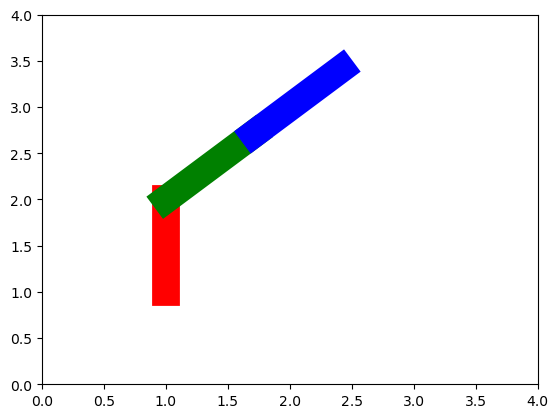

In [36]:
x1 = [t_O_1[0,3], t_O_2[0,3]] 
y1 = [t_O_1[1,3], t_O_2[1,3]] 
x2 = [t_O_2[0,3], t_O_3[0,3]] 
y2 = [t_O_2[1,3], t_O_3[1,3]] 
x3 = [t_O_3[0,3], t_O_P[0,3]] 
y3 = [t_O_3[1,3], t_O_P[1,3]] 
plt.plot(x1, y1, linewidth = 20.0, color = "RED")
plt.plot(x2, y2, linewidth = 20.0, color = "green")
plt.plot(x3, y3, linewidth = 20.0, color = (0, 0, 1.0))
plt.axis((0,4,0,4))
plt.show()

## Animación
Utilizando matplotlib.animation, se puede crear una función que cree frames para cada posición y éstos se animen

<Figure size 640x480 with 0 Axes>

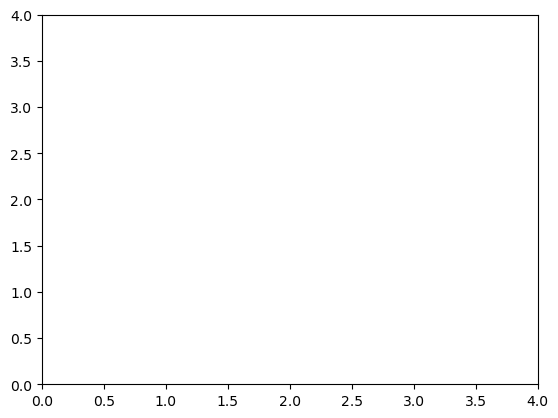

In [37]:
import matplotlib.animation as animation
plt.clf()
fig, ax = plt.subplots()
b1 = ax.plot(0, 0, linewidth = 20.0, color = "RED")[0]
b2 = ax.plot(0, 0, linewidth = 20.0, color = "GREEN")[0]
b3 = ax.plot(0, 0, linewidth = 20.0, color = "BLUE")[0]
ax.set(xlim = [0, 4], ylim = [0, 4])
def animar(frame):
  th_1 = math.radians(45)
  th_2 = math.radians(-45)
  th_3 = math.radians(frame)
  t_O_P = T_O_P.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)]) 
  t_O_3 = T_O_3.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)]) 
  t_O_2 = T_O_2.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)])
  t_O_1 = T_O_1.subs([(x_1, px_1), (y_1, py_1), (L_1, 1), (L_2, 1), (L_3, 1), (theta_1, th_1), (theta_2, th_2), (theta_3, th_3)])
  x1 = [t_O_1[0,3], t_O_2[0,3]] 
  y1 = [t_O_1[1,3], t_O_2[1,3]] 
  x2 = [t_O_2[0,3], t_O_3[0,3]] 
  y2 = [t_O_2[1,3], t_O_3[1,3]] 
  x3 = [t_O_3[0,3], t_O_P[0,3]] 
  y3 = [t_O_3[1,3], t_O_P[1,3]]
  b1.set_xdata([t_O_1[0,3], t_O_2[0,3]])
  b1.set_ydata([t_O_1[1,3], t_O_2[1,3]])
  b2.set_xdata([t_O_2[0,3], t_O_3[0,3]])
  b2.set_ydata([t_O_2[1,3], t_O_3[1,3]])
  b3.set_xdata([t_O_3[0,3], t_O_P[0,3]])
  b3.set_ydata([t_O_3[1,3], t_O_P[1,3]])
  return
anim = animation.FuncAnimation(fig=fig, func=animar, frames=180, interval=50)


Finalmente, podemos crear una animación con estos frames: 

Es necesario instalar una extensión con

$sudo apt-get install ffmpeg

In [38]:
from IPython.display import HTML
HTML(anim.to_html5_video())